<a href="https://colab.research.google.com/github/elqwaisney/ny-airbnb-advanced-sql-analysis/blob/main/SQL_NY_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NY Airbnb Analysis

## Drive mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing and connecting to SQLite DB




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [ ]:
conn = sqlite3.connect('airbnb.db')
cursor = conn.cursor()

In [ ]:
data_path_1 = '/content/drive/MyDrive/Data Science/SQL/AB_NYC_2019.csv'
df = pd.read_csv( data_path_1)
df.to_sql('listings', conn, if_exists = 'replace', index = False)

48895

## Fetching external coordinate data

In [ ]:
# import requests
# import pandas as pd
# import time

# # Sample neighbourhoods (replace this with your actual dataframe)
# neighbourhoods_df = df[['neighbourhood', 'neighbourhood_group']].drop_duplicates()

# # Create a function to get lat, lon for each neighbourhood
# def get_neighbourhood_coordinates(neighbourhood, neighbourhood_group):
#     try:
#         # Nominatim API endpoint
#         url =  f'https://nominatim.openstreetmap.org/search?q={neighbourhood},{neighbourhood_group},New York&format=json&addressdetails=1&limit=5'

#         # Set custom user-agent and referrer
#         headers = {
#             'User-Agent': 'YourAppName/1.0 (http://example.com/contact)',
#             'Referer': 'http://example.com/contact'
#         }

#         response = requests.get(url, headers=headers)
#         data = response.json()

#         if data:
#             # Try to find the most relevant result by checking if the address matches
#             for result in data:
#                 if 'address' in result and 'city' in result['address'] and result['address']['city'] == 'New York':
#                     return result['lat'], result['lon']
#             # If no relevant match, return the first result anyway
#             return data[0]['lat'], data[0]['lon']
#         else:
#             return None, None
#     except Exception as e:
#         print(f"Error getting data for {neighbourhood}: {e}")
#         return None, None

# # Create a list to store neighbourhoods with their coordinates
# coordinates = []

# # Loop through all unique neighbourhoods and their groups
# for index, row in neighbourhoods_df.iterrows():
#     neighbourhood = row['neighbourhood']
#     neighbourhood_group = row['neighbourhood_group']

#     lat, lon = get_neighbourhood_coordinates(neighbourhood, neighbourhood_group)
#     if lat and lon:
#         coordinates.append({
#             'neighbourhood': neighbourhood,
#             'neighbourhood_group': neighbourhood_group,
#             'latitude': lat,
#             'longitude': lon
#         })

#     time.sleep(1.5)  # Increased wait time to avoid hitting API rate limit

# # Convert to DataFrame
# coords_df = pd.DataFrame(coordinates)

# # Save the DataFrame to CSV (to avoid re-fetching the coordinates)
# coords_df.to_csv('neighbourhood_coordinates.csv', index=False)

# print("Coordinates saved successfully!")


Coordinates saved successfully!


In [ ]:
data_path_2 = '/content/drive/MyDrive/Data Science/SQL/neighbourhood_coordinates.csv'
df_coords = pd.read_csv(data_path_2)
df_coords.to_sql('neighbourhood_coordinates', conn, if_exists='replace', index=False)

212

In [ ]:
# @title Dataset
query = """
select *
from listings
limit 5

"""

result = pd.read_sql_query(query, conn)
result

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0        None   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

## Host Analysis

In [ ]:
# @title How many hosts in NYC

query = """
SELECT count(distinct host_id)
FROM listings;


"""

result = pd.read_sql_query(query, conn)
result

count(distinct host_id)
0                    37457

In [ ]:
# @title  Hosts with multiple listings?

query = """
select
  no_listings_per_host,
  count(host_id) as host_count,
  round(count(host_id)*100/sum(count(host_id)) over ()) percentage
from
  (select host_id, count(distinct id) as no_listings_per_host
from listings
group by host_id) as a
group by
  no_listings_per_host
order by
  no_listings_per_host
;

"""

result = pd.read_sql_query(query, conn)
result

no_listings_per_host  host_count  percentage
0                      1       32303        86.0
1                      2        3329         8.0
2                      3         951         2.0
3                      4         360         0.0
4                      5         169         0.0
5                      6          95         0.0
6                      7          57         0.0
7                      8          52         0.0
8                      9          26         0.0
9                     10          21         0.0
10                    11          10         0.0
11                    12          15         0.0
12                    13          10         0.0
13                    14           5         0.0
14                    15           5         0.0
15                    16           1         0.0
16                    17           4         0.0
17                    18           3         0.0
18                    19           1         0.0
19                    20           2         0.0
20                    21           1         0.0
21                    23           3         0.0
22                    25           2         0.0
23                    26           1         0.0
24                    27           1         0.0
25                    28           2         0.0
26                    29           1         0.0
27                    30           1         0.0
28                    31           2         0.0
29                    32           1         0.0
30                    33           3         0.0
31                    34           2         0.0
32                    37           1         0.0
33                    39           1         0.0
34                    43           1         0.0
35                    47           1         0.0
36                    49           2         0.0
37                    50           1         0.0
38                    52           2         0.0
39                    65           1         0.0
40                    87           1         0.0
41                    91           1         0.0
42                    96           2         0.0
43                   103           1         0.0
44                   121           1         0.0
45                   232           1         0.0
46                   327           1         0.0

In [ ]:
# @title Top hosts with most listings

query = """
SELECT host_id, host_name, COUNT(*) AS total_listings, count(distinct neighbourhood) neighbourhoods_range
FROM listings
GROUP BY host_id, host_name
ORDER BY total_listings DESC
LIMIT 10;

"""

result = pd.read_sql_query(query, conn)
result

host_id          host_name  total_listings  neighbourhoods_range
0  219517861       Sonder (NYC)             327                     7
1  107434423         Blueground             232                    21
2   30283594               Kara             121                    10
3  137358866             Kazuya             103                    10
4   12243051             Sonder              96                     5
5   16098958     Jeremy & Laura              96                    10
6   61391963  Corporate Housing              91                    10
7   22541573                Ken              87                    14
8  200380610            Pranjal              65                    12
9    1475015               Mike              52                     9

In [ ]:
# @title Average price per host

query = """
SELECT host_id, host_name, round(avg(price),2) average_price
FROM listings
GROUP BY host_id, host_name
order by average_price desc
LIMIT 11;

"""

result = pd.read_sql_query(query, conn)
result

host_id host_name  average_price
0     5143901      Erin        10000.0
1    20582832  Kathrine        10000.0
2    72390391    Jelena        10000.0
3     1235070     Olson         9999.0
4     3906464       Amy         9999.0
5     4382127      Matt         9999.0
6    18128455       Rum         8500.0
7     7407743      Jack         7500.0
8    11598359  Jonathan         6500.0
9    35303743  Patricia         6500.0
10  271248669     Jenny         6500.0

In [133]:
# @title Who are the highest earning hosts?
"""
 assuming each review corresponds to a booking for at least the minimum number of nights at the listed price
"""


query = """

with earnings_per_listing as (
  select
    id, host_id, host_name, name as listing, neighbourhood,
    (price * minimum_nights * number_of_reviews) as baseline_revenue_estimate
  from listings
  where (price * minimum_nights * number_of_reviews) > 0
),

earnings_with_ranks as (
  select *,
    rank() over(partition by host_id order by baseline_revenue_estimate desc) as rn,
    sum(baseline_revenue_estimate) over(partition by host_id) as total_revenue
  from earnings_per_listing
),

final as (
  select
    host_id, host_name, listing top_listing_name,
    baseline_revenue_estimate top_listing_baseline_revenue_estimate,
    total_revenue total_baseline_revenue_estimate,
    round((baseline_revenue_estimate * 100.0 / total_revenue), 2) as "top_listing_revenue_contribution (%)", neighbourhood
  from earnings_with_ranks
  where rn = 1 and baseline_revenue_estimate != total_revenue
)

select *
from final
order by total_baseline_revenue_estimate desc
limit 11;




"""

result = pd.read_sql_query(query, conn)
result

#so it looks like joni has the most total_baseline_revenue_estimate and 50% of that revenue comes from his brooklyn life apartment.

host_id host_name                                  top_listing_name  \
0    10992588      Joni  Brooklyn Life, Easy to Manhattan (30+ Days only)   
1      836168     Henry               Lux 2Bed/2.5Bath Central Park Views   
2     7245581   Michael  Great Chelsea Location, Couch/2nd bed, Free WiFi   
3    31626212      Troy                Central  Times Square w prvte bath   
4    30368670      Juan       Stylish Loft in Times Square with Roof Deck   
5     4548229   Brinton               Great Studio in the heart of Harlem   
6   151084261     Angie                   Beautiful place in Brooklyn! #2   
7     4562182  Florence                   Chic 2bed-2bath Manhattan Dream   
8       87773    Shelly                 Large 2 Bedroom Great for Groups!   
9     4185135     David                              Brooklyn two bedroom   
10    4393578      Jack   Ultra-Modern 6-bedroom House (Great for Groups)   

    top_listing_baseline_revenue_estimate  total_baseline_revenue_estimate  \
0                                 7046000                         14079600   
1                                 3540000                         11040000   
2                                  496800                          2911851   
3                                 1540350                          2609937   
4                                 2082780                          2330280   
5                                  769500                          2270145   
6                                 1894104                          2039094   
7                                  889200                          2010150   
8                                 1822500                          1944125   
9                                 1054700                          1932200   
10                                1454040                          1913040   

    top_listing_revenue_contribution (%)       neighbourhood  
0                                  50.04  Bedford-Stuyvesant  
1                                  32.07     Upper West Side  
2                                  17.06             Chelsea  
3                                  59.02    Theater District  
4                                  89.38      Hell's Kitchen  
5                                  33.90              Harlem  
6                                  92.89        Williamsburg  
7                                  44.24              Harlem  
8                                  93.74  Bedford-Stuyvesant  
9                                  54.59     Windsor Terrace  
10                                 76.01             Chelsea

In [ ]:
# @title Recent host review activity (within 30 days)
query = """
with recent_listings as(
  select *
  from listings
  where number_of_reviews is not null
  and julianday((select max(last_review) from listings)) - julianday(last_review) <= 30

),

host_activity as (
  select  host_id, host_name, calculated_host_listings_count no_of_listings,sum(number_of_reviews) total_reviews,  sum(number_of_reviews)/calculated_host_listings_count reviews_per_listing,
   group_concat(distinct neighbourhood_group) Boroughs
  from recent_listings
  group by host_id

)

select *
from host_activity
where reviews_per_listing !=0
order by reviews_per_listing desc

;



"""

#Dona is the most actively busy host, she has 602 reviews per listing, all her listings are in Queens

result = pd.read_sql_query(query, conn)
result

host_id host_name  no_of_listings  total_reviews  \
0       47621202      Dona               2           1205   
1        4734398        Jj               3           1798   
2        2369681     Carol               1            540   
3       12949460       Asa               1            488   
4         792159     Wanda               1            480   
...          ...       ...             ...            ...   
12601  272241217   Anthony               1              1   
12602  272308792  Takeshia               1              1   
12603  272557707  Marouene               1              1   
12604  272816114    Schmid               1              1   
12605  272872092     Chris               1              1   

       reviews_per_listing       Boroughs  
0                      602         Queens  
1                      599      Manhattan  
2                      540      Manhattan  
3                      488       Brooklyn  
4                      480       Brooklyn  
...                    ...            ...  
12601                    1      Manhattan  
12602                    1          Bronx  
12603                    1  Staten Island  
12604                    1      Manhattan  
12605                    1         Queens  

[12606 rows x 6 columns]

In [ ]:
# @title Who are the busiest hosts

"""
The criteria for a busy host is that:
- has more than one listing
- his/her last reviews on all his/her listings are within the last 6 months
- his/her number of reviews is above the average of all hosts


  Step 1: Compute the median of average number_of_reviews per host for hosts that have more than one listing.
  Step 2: Get only hosts whose average reviews > that median.
  Step 3: For each of those hosts, computed:
   - Total reviews across all listings.
   - The listing with the highest review numbers.
Step 4: Calculate what percentage this top listing contributes to the host’s total reviews.
"""

query = """


with active_listings as (
  select *
  from listings
  where last_review > '2019-01-01'
),


avg_reviews_per_host  as (

select host_id, round(avg(number_of_reviews)) avg_rev
from active_listings
group by host_id
having count(*) > 1
),

ordered_reviews as (

  select *, row_number() over(order by avg_rev asc) row_num,
  count(*) over() total_rows
  from avg_reviews_per_host
),

hosts_above_median as (

  select *
  from avg_reviews_per_host
  where avg_rev > (

    select avg(avg_rev) median_rev
    from ordered_reviews
    where row_num in (floor(total_rows +1)/2, ceil(total_rows+1)/2))
),


max_listing as (

  select l.host_id,l.host_name, l.name, l.number_of_reviews, l.latitude, l.longitude,
  row_number() over(partition by l.host_id order by l.number_of_reviews desc) rn
  from active_listings l
  join hosts_above_median h on l.host_id = h.host_id

),



total_reviews_per_host as (
  select host_id, sum(number_of_reviews) total_reviews
  from active_listings
  group by host_id
)




select m.host_id, m.host_name, m.name top_reviewd_listing, m.latitude, m.longitude, m.number_of_reviews, ifnull(round(m.number_of_reviews * 100.0 / t.total_reviews, 2), 'NO REVIEWS') top_listing_reviews_contribution_percent, t.total_reviews total_host_reviews
from max_listing m
join total_reviews_per_host t on m.host_id = t.host_id
where rn = 1
order by t.total_reviews desc




"""


result = pd.read_sql_query(query, conn)
result

host_id                       host_name  \
0      37312959                            Maya   
1        344035  Brooklyn&   Breakfast    -Len-   
2      26432133                        Danielle   
3      35524316                    Yasu & Akiko   
4      40176101                           Brady   
...         ...                             ...   
1547   21340955                           Shean   
1548   32295097                         Maureen   
1549   38460304                            Leon   
1550   96379938                       Alexander   
1551  185914925                            Mala   

                                    top_reviewd_listing  latitude  longitude  \
0                     Steps away from Laguardia airport  40.77006  -73.87683   
1            Lg Prospect Hts Room at Brooklyn&Breakfast  40.67883  -73.97051   
2     Cozy Room Family Home LGA Airport NO CLEANING FEE  40.76335  -73.87007   
3                      [303] 5 min WALK to Times Square  40.75987  -73.99056   
4            Classic Elegance in Brownstone Near Subway  40.68927  -73.93035   
...                                                 ...       ...        ...   
1547                    Sunny, Spacious, Parkside Room!  40.65402  -73.96073   
1548  Paris in New York Cozy private entrance&bath b...  40.71454  -73.98782   
1549                          Brooklyn Studio apartment  40.69169  -73.93142   
1550  Comfort, convenience, elegance near Prospect Park  40.65381  -73.94819   
1551  Comfy single private room at quiet area in Queens  40.71520  -73.76171   

      number_of_reviews  top_listing_reviews_contribution_percent  \
0                   543                                     23.89   
1                   258                                     11.70   
2                   510                                     25.29   
3                   203                                     10.30   
4                   327                                     17.99   
...                 ...                                       ...   
1547                 33                                     54.10   
1548                 33                                     54.10   
1549                 34                                     55.74   
1550                 48                                     78.69   
1551                 40                                     65.57   

      total_host_reviews  
0                   2273  
1                   2205  
2                   2017  
3                   1971  
4                   1818  
...                  ...  
1547                  61  
1548                  61  
1549                  61  
1550                  61  
1551                  61  

[1552 rows x 8 columns]

In [ ]:
# @title Mapping of Busiest Hosts' Listing Locations

import folium
from folium import LinearColormap

# Create a base map centered around NYC
nyc_map = nyc_map = folium.Map(
    location=[40.7128, -74.0060],
    zoom_start=12,
    tiles="CartoDB Dark Matter")


# Define a color map
colormap = LinearColormap(
    colors=['green', 'yellow', 'red'],
    vmin=result['total_host_reviews'].min(),
    vmax=result['total_host_reviews'].max()
)
colormap.caption = 'Total Host Reviews'

# Plot each host's most reviewed listing on the map without clustering
for idx, row in result.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=row['number_of_reviews'] / 50,  # Adjust marker size for visibility
        color=colormap(row['total_host_reviews']),
        fill=True,
        fill_color=colormap(row['total_host_reviews']),
        fill_opacity=0.7,
        popup=(
            f"<b>Host Name:</b> {row['host_name']}<br>"
            f"<b>Top Reviewed Listing:</b> {row['top_reviewd_listing']}<br>"
            f"<b>Number of Reviews:</b> {row['number_of_reviews']}<br>"
            f"<b>Top Listing Reviews Contribution:</b> {row['top_listing_reviews_contribution_percent']}%<br>"
            f"<b>Total Host Reviews:</b> {row['total_host_reviews']}"
        )
    ).add_to(nyc_map)

# Add the colormap to the map
colormap.add_to(nyc_map)

# Display the map
nyc_map




🔍 **Insights on the Busiest Hosts' Locations**

The busiest hosts tend to have listings near major transportation hubs. For example, **Maya** and **Danielle** have listings close to **LaGuardia Airport**, while **Dona** is near **JFK Airport**. Additionally, popular spots around **subway-accessible areas** like **Brownstone Brooklyn** stand out.

This trend indicates that Airbnb guests prioritize locations near transportation, as most don’t have private transportation options. The success of these listings reinforces that proximity to key landmarks, such as airports and subway stations, is a crucial factor for attracting high demand.


## Listing Analysis

In [132]:
# @title How many listings in NYC

query = """
SELECT count(distinct id) number_of_listings
FROM listings;


"""

result = pd.read_sql_query(query, conn)
result

number_of_listings
0               48895

In [ ]:
# @title Which listing has the highest revenue potential (price × availability_365)?

query = """
SELECT host_name, name, (price * availability_365) highest_revenue_potential
FROM listings
where last_review > '2019-01-01'
GROUP BY id
ORDER BY highest_revenue_potential DESC

"""

result = pd.read_sql_query(query, conn)
result


#I chose active listings which their last review is within the last 6 months

host_name                                               name  \
0          Debra    Midtown Manhattan great location (Gramacy park)   
1         Sandra                               Gem of east Flatbush   
2      Stephanie       SPECTACULAR SOHO GREAT ROOM LOFT 6000sq feet   
3           Shah                      Majestic Mansion LifeStyle :)   
4          Diana  Ultimate 50th Floor Downtown Penthouse  - 4000...   
...          ...                                                ...   
24806   Marlaine                Quiet, sunny Midtown Manhattan apt.   
24807       Doug              Fort Greene, Brooklyn: Center Bedroom   
24808      Coral                     Financial District Luxury Loft   
24809        Syl  * Spacious GARDEN Park Slope Duplex* 6 people max   
24810        Sol                   NYC artists’ loft with roof deck   

       highest_revenue_potential  
0                        1749300  
1                        1342500  
2                         975000  
3                         941200  
4                         771750  
...                          ...  
24806                          0  
24807                          0  
24808                          0  
24809                          0  
24810                          0  

[24811 rows x 3 columns]

In [ ]:
# @title What are the top 10 expensive neighbourhoods?

query = """
SELECT neighbourhood_group, neighbourhood, ROUND(AVG(price),2)  average_price
FROM listings
GROUP BY neighbourhood
ORDER BY average_price DESC
LIMIT 11;
"""

result = pd.read_sql_query(query, conn)
result

neighbourhood_group      neighbourhood  average_price
0        Staten Island     Fort Wadsworth         800.00
1        Staten Island            Woodrow         700.00
2            Manhattan            Tribeca         490.64
3             Brooklyn           Sea Gate         487.86
4                Bronx          Riverdale         442.09
5        Staten Island       Prince's Bay         409.50
6            Manhattan  Battery Park City         367.56
7            Manhattan  Flatiron District         341.93
8        Staten Island      Randall Manor         336.00
9            Manhattan               NoHo         295.72
10           Manhattan               SoHo         287.10

In [ ]:
# @title Which Borough has the highest number of listings?

query = """

select neighbourhood_group, count(*) no_of_listings, round(count(*)*100/(select count(*) from listings),2) listing_percentage
from listings
group by neighbourhood_group
order by count(*) desc
"""
result = pd.read_sql_query(query, conn)
result

neighbourhood_group  no_of_listings  listing_percentage
0           Manhattan           21661                44.0
1            Brooklyn           20104                41.0
2              Queens            5666                11.0
3               Bronx            1091                 2.0
4       Staten Island             373                 0.0

In [ ]:
# @title Which neighborhoods have the most listings?

query = """
SELECT neighbourhood, COUNT(*) listings_count
FROM listings
GROUP BY neighbourhood
ORDER BY listings_count DESC
LIMIT 10;

"""

result = pd.read_sql_query(query, conn)
result

neighbourhood  listings_count
0        Williamsburg            3920
1  Bedford-Stuyvesant            3714
2              Harlem            2658
3            Bushwick            2465
4     Upper West Side            1971
5      Hell's Kitchen            1958
6        East Village            1853
7     Upper East Side            1798
8       Crown Heights            1564
9             Midtown            1545

In [ ]:
# @title What is the average price by neighborhood group?

query = """
SELECT neighbourhood_group, round(AVG(price),2) average_price
FROM listings
GROUP BY neighbourhood_group
"""

result = pd.read_sql_query(query, conn)
result

neighbourhood_group  average_price
0               Bronx          87.50
1            Brooklyn         124.38
2           Manhattan         196.88
3              Queens          99.52
4       Staten Island         114.81

In [ ]:
# @title What are the popular neighbourhoods

query = """
WITH neighborhood_stats AS (
    SELECT
        neighbourhood,
        COUNT(*) AS total_listings,
        AVG(number_of_reviews) AS avg_reviews,
        SUM(number_of_reviews) AS total_reviews
    FROM listings
    GROUP BY neighbourhood
),

-- Get the median total listings
listing_medians AS (
    SELECT
        AVG(total_listings) AS median_total_listings
    FROM (
        SELECT total_listings
        FROM neighborhood_stats
        ORDER BY total_listings
        LIMIT 2 - (SELECT COUNT(*) FROM neighborhood_stats) % 2  -- Handle even/odd count
        OFFSET (SELECT (COUNT(*) - 1) / 2 FROM neighborhood_stats)
    )
),

-- Get the median average reviews
review_medians AS (
    SELECT
        AVG(avg_reviews) AS median_avg_reviews
    FROM (
        SELECT avg_reviews
        FROM neighborhood_stats
        ORDER BY avg_reviews
        LIMIT 2 - (SELECT COUNT(*) FROM neighborhood_stats) % 2
        OFFSET (SELECT (COUNT(*) - 1) / 2 FROM neighborhood_stats)
    )
)




  SELECT
    n.neighbourhood,
    n.total_listings,
    n.avg_reviews,
    n.total_reviews,
    nc.latitude, nc.longitude,


    CASE
        WHEN n.total_listings >= lm.median_total_listings AND n.avg_reviews >= rm.median_avg_reviews THEN 'Popular'
        WHEN n.total_listings < lm.median_total_listings AND n.avg_reviews < rm.median_avg_reviews THEN 'Unpopular'
        WHEN n.total_listings >= lm.median_total_listings THEN 'High Listings, Low Reviews'
        ELSE 'Low Listings, High Reviews'
    END AS popularity_category
FROM neighborhood_stats n
CROSS JOIN listing_medians lm
CROSS JOIN review_medians rm
JOIN neighbourhood_coordinates nc
ON n.neighbourhood = nc.neighbourhood
;



"""
result = pd.read_sql_query(query, conn)
result

neighbourhood  total_listings  avg_reviews  total_reviews   latitude  \
0           Allerton              42    42.928571           1803  40.865430   
1      Arden Heights               4     7.750000             31  40.563700   
2           Arrochar              21    14.619048            307  40.598438   
3            Arverne              77    29.259740           2253  40.593417   
4            Astoria             900    21.455556          19310  40.772014   
..               ...             ...          ...            ...        ...   
207  Windsor Terrace             157    27.541401           4324  40.653487   
208        Woodhaven              88    31.727273           2792  40.689270   
209         Woodlawn              11    44.000000            484  40.886272   
210          Woodrow               1     0.000000              0  40.543439   
211         Woodside             235    21.425532           5035  40.745380   

     longitude         popularity_category  
0   -73.867365                     Popular  
1   -74.191603                   Unpopular  
2   -74.072641                   Unpopular  
3   -73.789546                     Popular  
4   -73.930267  High Listings, Low Reviews  
..         ...                         ...  
207 -73.977196                     Popular  
208 -73.857913                     Popular  
209 -73.878581  Low Listings, High Reviews  
210 -74.197644                   Unpopular  
211 -73.905415  High Listings, Low Reviews  

[212 rows x 7 columns]

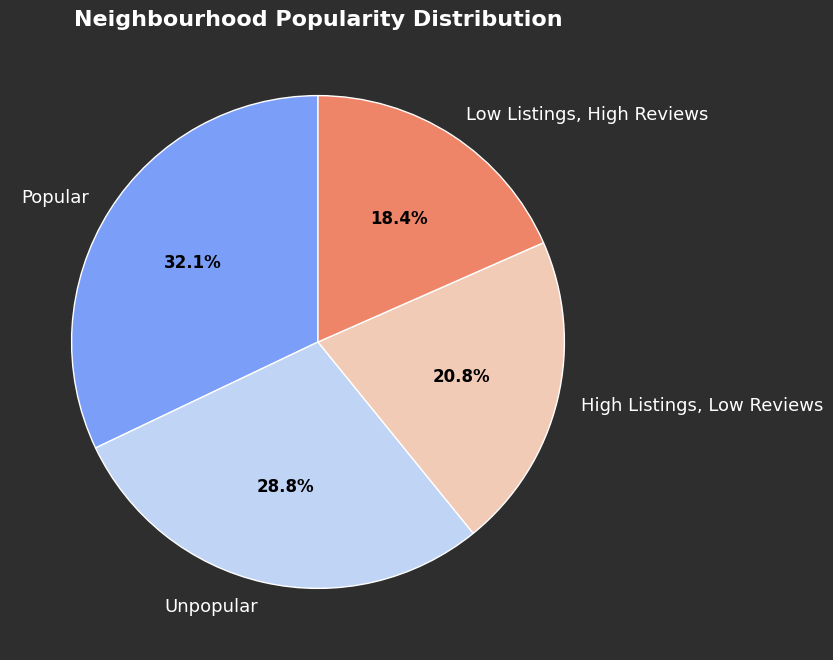

In [ ]:
# @title Popularity Distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Use a built-in Matplotlib style
plt.style.use('ggplot')

# Assuming 'result' DataFrame has a 'popularity_category' column
popularity_counts = result['popularity_category'].value_counts()

# Define a color palette (using seaborn's modern palettes)
colors = sns.color_palette("coolwarm", len(popularity_counts))

# Create the pie chart with dark gray background
fig, ax = plt.subplots(figsize=(8, 8))

# Set the figure and axis background to a dark theme (dark gray, similar to Colab)
fig.patch.set_facecolor('#2E2E2E')  # Dark gray background for the figure
ax.set_facecolor('#2E2E2E')         # Dark gray background for the axes

# Create the pie chart
wedges, texts, autotexts = ax.pie(
    popularity_counts,
    labels=popularity_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 12, 'color': 'white'}
)

# Set the title with modern font style and white color
plt.title('Neighbourhood Popularity Distribution', fontsize=16, fontweight='bold', color='white')

# Style the text and percentage labels
for text in texts:
    text.set_fontsize(13)
    text.set_color('white')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

# Display the chart
plt.show()


In [ ]:
popular_neighbourhoods = result[result['popularity_category'] == 'Popular']
popular_neighbourhoods_sorted = popular_neighbourhoods.sort_values(by=['total_listings', 'avg_reviews'], ascending=[False, False])
popular_neighbourhoods_sorted.head().reset_index(drop=True)

neighbourhood  total_listings  avg_reviews  total_reviews   latitude  \
0        Williamsburg            3920    21.792602          85427  40.714622   
1  Bedford-Stuyvesant            3714    29.712439         110352  40.683436   
2              Harlem            2658    28.578631          75962  40.807879   
3      Hell's Kitchen            1958    25.652196          50227  40.764423   
4        East Village            1853    24.106854          44670  40.729269   

   longitude popularity_category  
0 -73.953450             Popular  
1 -73.941249             Popular  
2 -73.945415             Popular  
3 -73.992392             Popular  
4 -73.987361             Popular

In [ ]:
# @title Neighbourhood Popularity Mapping



import folium
from folium.plugins import HeatMap
import numpy as np

# Create a base map centered around NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12, tiles="CartoDB Dark Matter")

# Create a list to hold coordinates and intensity for the heatmap
heat_data = []

# Prepare data for the heatmap (latitude, longitude, intensity)
for idx, row in result.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    total_listings = row['total_listings']

    # You can scale the intensity by total listings, or use another metric
    intensity = np.sqrt(total_listings)  # Using square root to soften intensity
    heat_data.append([lat, lon, intensity])

# Add HeatMap layer to the map
HeatMap(heat_data, radius=15, max_zoom=13).add_to(nyc_map)

# Display the map
nyc_map


🔍 **Insight**

Most popular neighborhoods in New York City tend to cluster around **lower Manhattan**, particularly near the Hudson River. This is likely due to the area's proximity to major landmarks such as the Financial District, the Statue of Liberty, and iconic spots like Times Square and Wall Street. Additionally, the area benefits from excellent transportation links, including subway stations, ferries, and proximity to major bridges and tunnels.

The high tourist demand in this part of the city, combined with its central location, makes it an attractive place for Airbnb hosts. Visitors often prefer staying close to major attractions and transportation hubs, driving up the number of listings in these neighborhoods.


In [ ]:
# @title  What proportion of listings are likely “ghost listings” (available but likely never booked i.e: got 0 reviews or haven't been reviewd )?


query =f"""
SELECT
  neighbourhood_group,
  COUNT(*) AS total_listings,
  SUM(CASE WHEN number_of_reviews = 0 OR last_review < '2018-01-01' THEN 1 ELSE 0 END)  AS ghost_listings,
  ROUND(100.0 * SUM(CASE WHEN number_of_reviews = 0 THEN 1 ELSE 0 END) / COUNT(*), 2) AS ghost_listing_percentage
FROM listings
GROUP BY neighbourhood_group
ORDER BY ghost_listing_percentage DESC;
"""

result = pd.read_sql_query(query, conn)
result

neighbourhood_group  total_listings  ghost_listings  \
0           Manhattan           21661            8709   
1               Bronx            1091             274   
2              Queens            5666            1620   
3            Brooklyn           20104            6963   
4       Staten Island             373              70   

   ghost_listing_percentage  
0                     23.22  
1                     19.71  
2                     19.27  
3                     18.19  
4                     15.82

## Pricing and Demand Trends



In [ ]:
# @title What is the average price per room type?

query = """
SELECT room_type, ROUND(AVG(price),2)  average_price
FROM listings
GROUP BY room_type
ORDER BY average_price DESC;
"""

result = pd.read_sql_query(query, conn)
result


room_type  average_price
0  Entire home/apt         211.79
1     Private room          89.78
2      Shared room          70.13

In [ ]:
# @title Which room types have the highest/lowest availability?

query = """
SELECT room_type, floor(avg(availability_365)) avg_availability
FROM listings
GROUP BY room_type
ORDER BY avg_availability DESC
LIMIT 10;
"""

result = pd.read_sql_query(query, conn)
result



room_type  avg_availability
0      Shared room             162.0
1     Private room             111.0
2  Entire home/apt             111.0

In [ ]:
# @title Classifying neighbourhoods according to price and demand

price_median = df['price'].median()
reviews_median = df['number_of_reviews'].median()


query =f"""
WITH clusters AS (
  SELECT
    id,
    neighbourhood,
    CASE
      WHEN price > {price_median} AND number_of_reviews < {reviews_median} THEN 'High Price - Low Demand'
      WHEN price < {price_median} AND number_of_reviews > {reviews_median} THEN 'Low Price - High Demand'
      WHEN price > {price_median} AND number_of_reviews > {reviews_median} THEN 'High Price - High Demand'
      ELSE 'Low Price - Low Demand'
    END AS cluster_group
  FROM listings
),

neighbourhood_ranks AS (
  SELECT
    neighbourhood,
    cluster_group,
    COUNT(*) AS no_of_listings,
    RANK() OVER (PARTITION BY cluster_group ORDER BY COUNT(*) DESC) AS rank_in_cluster
  FROM clusters
  GROUP BY neighbourhood, cluster_group
)

SELECT nr.neighbourhood, cluster_group, no_of_listings, rank_in_cluster, nc.latitude, nc.longitude
FROM neighbourhood_ranks nr
join neighbourhood_coordinates nc on nr.neighbourhood = nc.neighbourhood
ORDER BY cluster_group, rank_in_cluster

;
"""

result = pd.read_sql_query(query, conn)
result

neighbourhood             cluster_group  no_of_listings  \
0                  Williamsburg  High Price - High Demand             964   
1            Bedford-Stuyvesant  High Price - High Demand             789   
2                Hell's Kitchen  High Price - High Demand             704   
3                  East Village  High Price - High Demand             678   
4               Upper East Side  High Price - High Demand             579   
..                          ...                       ...             ...   
743                 Westerleigh    Low Price - Low Demand               1   
744  Bay Terrace, Staten Island    Low Price - Low Demand               1   
745                    Rosebank    Low Price - Low Demand               1   
746                  Mill Basin    Low Price - Low Demand               1   
747                    New Dorp    Low Price - Low Demand               1   

     rank_in_cluster   latitude  longitude  
0                  1  40.714622 -73.953450  
1                  2  40.683436 -73.941249  
2                  3  40.764423 -73.992392  
3                  4  40.729269 -73.987361  
4                  5  40.774383 -73.964641  
..               ...        ...        ...  
743              190  40.621215 -74.131809  
744              190  40.555278 -74.134167  
745              190  40.613993 -74.066252  
746              190  40.609833 -73.907585  
747              190  40.573949 -74.116246  

[748 rows x 6 columns]

In [ ]:
# @title Top ranking neighbourhoods in each category
result [result['rank_in_cluster']==1]

neighbourhood             cluster_group  no_of_listings  \
0          Williamsburg  High Price - High Demand             964   
176        Williamsburg   High Price - Low Demand             900   
353  Bedford-Stuyvesant   Low Price - High Demand            1285   
551  Bedford-Stuyvesant    Low Price - Low Demand            1232   

     rank_in_cluster   latitude  longitude  
0                  1  40.714622 -73.953450  
176                1  40.714622 -73.953450  
353                1  40.683436 -73.941249  
551                1  40.683436 -73.941249

In [ ]:
# @title Price and demand distribution map

import folium

# Define a color mapping for the clusters (bright, neon-like colors)
color_mapping = {
    'High Price - High Demand': '#39FF14',   # Neon Green
    'High Price - Low Demand': '#FFFFFF',    # White
    'Low Price - High Demand': '#B0FF00',    # Neon pink
    'Low Price - Low Demand': '#FF073A'      # Neon Red
}


# Create a base map centered around NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12, tiles="CartoDB Dark Matter")

# Plot the points on the map with popups and tooltips
for idx, row in result.iterrows():
    if pd.notna(row['latitude']) and pd.notna(row['longitude']):
        folium.CircleMarker(
            location=(row['latitude'], row['longitude']),
            radius=row['no_of_listings'] / 20,  # Adjust marker size for visibility
            color=color_mapping[row['cluster_group']],
            fill=True,
            fill_color=color_mapping[row['cluster_group']],
            fill_opacity=0.7,
            tooltip=folium.Tooltip(f"Neighbourhood: {row['neighbourhood']}"),  # Tooltip on hover
            popup=folium.Popup(f"""
                <b>Neighbourhood:</b> {row['neighbourhood']}<br>
                <b>Cluster Group:</b> {row['cluster_group']}<br>
                <b>Number of Listings:</b> {row['no_of_listings']}<br>
                <b>Rank in Cluster:</b> {row['rank_in_cluster']}
            """, max_width=300)
        ).add_to(nyc_map)

# Display the map
nyc_map


🔍 **Insight**

The faded green color represents low price, high demand, while the neon green color represents high price, high demand. Focusing on high demand, we observe that neighborhoods like East Village exhibit high price, high demand, making it an excellent target for hosts to list their properties. The same can be said for Lower East Side and Chinatown.

On the other hand, neighborhoods with high price but low demand, represented by the white color, are more prevalent in areas farther from Lower Manhattan, extending into Upper Manhattan. Despite being in Manhattan, hosts in these areas tend to raise their prices but do not experience the same level of demand as those in Lower Manhattan.

However, a few neighborhoods in Upper Manhattan, such as Harlem and East Harlem, show high demand due to their relatively lower prices.

Williamsburg ranks highly in both the high demand-high price and low demand-high price categories. However, it appears to lean more towards the low demand side, suggesting that hosts should exercise caution when listing their properties in this neighborhood. It is important for listings to be near major landmarks and offer high quality.

In Bedford-Stuyvesant, while the area ranks high in low price but high demand, it also ranks among the highest in low listings. As with Williamsburg, hosts should be cautious about where they place their listings within this neighborhood.

These are the major neighborhoods with substantial numbers of listings.

In [ ]:
# @title Which listings have a price higher than 5x the average price of their neighbourhood group?

query = """

with avg_prices as (
  select neighbourhood, avg(price) avg_price
  from listings
  group by neighbourhood
)


select l.id, l.host_name, l.neighbourhood, l. price, l.name listing_name, room_type, minimum_nights
from listings l
join avg_prices p on l.neighbourhood= p.neighbourhood
and l.price > 5 * p.avg_price
where availability_365 > 0
order by l.price desc

;

"""

result = pd.read_sql_query(query, conn)
result

id         host_name    neighbourhood  price  \
0    22436899            Jelena  Upper West Side  10000   
1     9528920               Amy  Lower East Side   9999   
2    31340283              Matt  Lower East Side   9999   
3    23377410               Rum          Tribeca   8500   
4     2953058           Jessica     Clinton Hill   8000   
..        ...               ...              ...    ...   
269   7997433             Isaac         Woodside    450   
270  33068174          Geovanny         Elmhurst    443   
271  34498121            Joshua         Bushwick    425   
272  25031387  Monique & Bianca      Kingsbridge    399   
273  22207770             Ahmed           Corona    359   

                                          listing_name        room_type  \
0                                  1-BR Lincoln Center  Entire home/apt   
1                  Quiet, Clean, Lit @ LES & Chinatown     Private room   
2    2br - The Heart of NYC: Manhattans Lower East ...  Entire home/apt   
3    Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho  Entire home/apt   
4                                        Film Location  Entire home/apt   
..                                                 ...              ...   
269  30 Mins to Times Square -Javits Ctr! Awesome f...  Entire home/apt   
270                                               Home     Private room   
271                         Gorgeous Bushwick Townhome  Entire home/apt   
272   2 Bedroom 1 Bath by NYC Train and Major Highways  Entire home/apt   
273   AWESOME PRIVATE FAMILY HOUSE  CLOSE TO MANHATTAN  Entire home/apt   

     minimum_nights  
0                30  
1                99  
2                30  
3                30  
4                 1  
..              ...  
269               1  
270               1  
271               3  
272               2  
273               3  

[274 rows x 7 columns]

In [ ]:
# Finding out the room type of most overpriced listings
result['room_type'].value_counts()

room_type
Entire home/apt    217
Private room        55
Shared room          2
Name: count, dtype: int64

🔍 **Insight: Why Are These Listings Overpriced?**

It is reasonable to conclude that most of the overpriced listings are entire homes or apartments. This observation is further supported by examining the names of these listings. For instance, the top listing, **“1-BR Lincoln Center”**, likely refers to a **one-bedroom apartment located near Lincoln Center**, a prestigious and well-known performing arts complex in Manhattan. The combination of offering a private apartment and being situated near a major landmark justifies the significantly higher pricing.

In [ ]:
# @title What is the average price by neighbourhood_group?

query = """
select neighbourhood_group, round(avg(price)) avg_price
from listings
group by neighbourhood_group
"""

result = pd.read_sql_query(query, conn)
result

neighbourhood_group  avg_price
0               Bronx       87.0
1            Brooklyn      124.0
2           Manhattan      197.0
3              Queens      100.0
4       Staten Island      115.0

In [ ]:
# @title Which Buroughs have the highest number of overpriced listings?

q3 = df['price'].quantile(0.75)

query = f"""
select neighbourhood_group Borough, count(*) overpriced_listings_count
from listings
where price > {q3}
group by neighbourhood_group
order by overpriced_listings_count desc
"""
result = pd.read_sql_query(query, conn)
result

Borough  overpriced_listings_count
0      Manhattan                       8275
1       Brooklyn                       3258
2         Queens                        540
3          Bronx                         62
4  Staten Island                         42

In [ ]:
# @title  Are super expensive listings more/less likely to get reviews?


q1 = df['price'].quantile(0.25)
q2 = df['price'].quantile(0.50)
q3 = df['price'].quantile(0.75)
query =f"""
WITH bins AS (
  SELECT *,
         CASE
           WHEN price <= {q1} THEN 'Low Price'
           WHEN price > {q1} AND price <= {q2} THEN 'Mid-Low Price'
           WHEN price > {q2} AND price <= {q3} THEN 'Mid-High Price'
           ELSE 'Expensive'
         END AS price_group
  FROM listings
)

SELECT price_group,
       COUNT(*) AS total_listings,
       ROUND(AVG(number_of_reviews), 2) AS avg_reviews
FROM bins
GROUP BY price_group
ORDER BY
  CASE price_group
    WHEN 'Low Price' THEN 1
    WHEN 'Mid-Low Price' THEN 2
    WHEN 'Mid-High Price' THEN 3
    WHEN 'Expensive' THEN 4
  END;
"""

result = pd.read_sql_query(query, conn)
result

price_group  total_listings  avg_reviews
0       Low Price           12371        22.71
1   Mid-Low Price           12101        26.47
2  Mid-High Price           12246        25.55
3       Expensive           12177        18.38

🔍 **Insight**

It is observed that the most reviewed categories of listings tend to be those priced at mid-high and mid-low ranges. In contrast, listings with higher prices generally receive fewer reviews, indicating a lower level of demand for these more expensive options.

In [ ]:
# @title Neighbourhoods with the most active listings (latest_reviews is recent)



query ="""
select neighbourhood, count(*) no_of_active_listings
from listings
where julianday((select max(last_review) from listings)) - julianday(last_review) <= 30
group by neighbourhood
order by no_of_active_listings desc
limit 10
"""

result = pd.read_sql_query(query, conn)
result

neighbourhood  no_of_active_listings
0  Bedford-Stuyvesant                   1482
1        Williamsburg                   1095
2              Harlem                    914
3            Bushwick                    754
4      Hell's Kitchen                    747
5        East Village                    526
6       Crown Heights                    485
7     Upper East Side                    484
8     Upper West Side                    448
9         East Harlem                    445

In [ ]:
# @title what is the average price by room type?


query ="""
select room_type, round(avg(price),1) avg_price
from listings
group by room_type
"""

result = pd.read_sql_query(query, conn)
result

room_type  avg_price
0  Entire home/apt      211.8
1     Private room       89.8
2      Shared room       70.1

In [ ]:
# @title Which room type is more felxible in terms of minimum nights


query ="""
select room_type, round(avg(minimum_nights),1) avg_minimum_nights
from listings
group by room_type
"""

result = pd.read_sql_query(query, conn)
result

room_type  avg_minimum_nights
0  Entire home/apt                 8.5
1     Private room                 5.4
2      Shared room                 6.5

In [ ]:
# @title Which neighbourhoods have more listings per host, indicating market concentration?

query ="""
with cte as (
select neighbourhood, count(*) no_of_listings, count(distinct host_id) no_of_hosts
from listings
group by neighbourhood
)

select neighbourhood, no_of_listings, no_of_hosts, no_of_listings/ no_of_hosts avg_listings_per_host
from cte
order by avg_listings_per_host desc
limit 11
"""

result = pd.read_sql_query(query, conn)
result

neighbourhood  no_of_listings  no_of_hosts  avg_listings_per_host
0        Eastchester              13            2                      6
1        Castle Hill               9            3                      3
2           Arrochar              21           10                      2
3        Bull's Head               6            3                      2
4            Concord              26           10                      2
5    East Morrisania              10            5                      2
6           Flushing             426          209                      2
7         Grant City               6            3                      2
8        Hunts Point              18            8                      2
9   Theater District             288          140                      2
10     West Brighton              18            9                      2

🔍 **Insight:**

A high average number of listings per host in a neighborhood may indicate **market concentration**, where a few hosts dominate the rental market by controlling a large number of properties. This concentration can lead to **market inefficiency**, as a small group of hosts control most of the available rental units.

Such a scenario could result in **price inflation**, as these dominant hosts may have the leverage to set higher prices due to reduced competition. Additionally, the **diversity of listings** could decrease, limiting options for potential guests. With fewer hosts in the market, there may also be a reduction in **competition**, which can stifle **innovation** and **variety** in the quality of listings and services offered.


Taking a closer look at *Eastchester*:

In [ ]:
# @title Taking a closer look at Eastchester
query ="""
select *
from listings
where neighbourhood = 'Eastchester'
"""

result = pd.read_sql_query(query, conn)
result

id                                               name    host_id  \
0      63610   DOMINIQUE'S NY mini efficiency* wifi*metro*quiet     310670   
1    4082062  Unique room w/2 Twin beds..wifi*metro* quiet*safe     310670   
2    4093399        DOMINIQUE'S NY*chic*  quiet room*wifi*metro     310670   
3    4963237  DOMINIQUE'S  NYC  cosy,2 bedrm crashPad*Stay h...     310670   
4    4963511  Dominiq's NY cosy 3bedrm crashpad*metro*wifi*$...     310670   
5    6421429   Dominique's LowerLevel 1 bdrm pad*video projects     310670   
6    7791635  Dominique's mini room NYC-sleep, shower & go*wifi     310670   
7    7791636  **Dominique's NYC couch bed **sleep*shower &  ...     310670   
8   14994076   Dominiques NYC 4Bedrm crashpad**Stay here**metro     310670   
9   27526997  Vie's NY Unique crashpad apts sleep 14, metro*...     310670   
10  28046788                          Spacious bronx room for 1  211321817   
11  31225319   Dominiques unique twin room*NYC-wifi* metro*safe     310670   
12  31670237  Dominiques Homesharing  room NYC* metro*quiet*...     310670   

    host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         Vie               Bronx   Eastchester  40.88057  -73.83572   
1         Vie               Bronx   Eastchester  40.88060  -73.83433   
2         Vie               Bronx   Eastchester  40.88009  -73.83442   
3         Vie               Bronx   Eastchester  40.87829  -73.83471   
4         Vie               Bronx   Eastchester  40.88017  -73.83484   
5         Vie               Bronx   Eastchester  40.88241  -73.83422   
6         Vie               Bronx   Eastchester  40.88001  -73.83450   
7         Vie               Bronx   Eastchester  40.88211  -73.83625   
8         Vie               Bronx   Eastchester  40.88207  -73.83538   
9         Vie               Bronx   Eastchester  40.88017  -73.83574   
10  Alexander               Bronx   Eastchester  40.88271  -73.83217   
11        Vie               Bronx   Eastchester  40.88179  -73.83455   
12        Vie               Bronx   Eastchester  40.88009  -73.83456   

          room_type  price  minimum_nights  number_of_reviews last_review  \
0   Entire home/apt    105               2                 38  2019-06-27   
1      Private room     75               2                 37  2019-06-16   
2      Private room     68               2                 41  2019-01-01   
3   Entire home/apt    155               2                 11  2019-05-19   
4   Entire home/apt    250               1                 15  2019-06-02   
5   Entire home/apt    115               1                  6  2019-06-30   
6      Private room     62               2                  5  2017-07-11   
7       Shared room     45               1                  1  2019-04-20   
8   Entire home/apt    299               2                  2  2019-05-21   
9   Entire home/apt    475               2                  0        None   
10     Private room     50               1                  0        None   
11     Private room     75               2                  1  2019-04-20   
12     Private room     68               2                  0        None   

    reviews_per_month  calculated_host_listings_count  availability_365  
0                0.50                              13               365  
1                0.73                              13               364  
2                0.74                              13               365  
3                0.29                              13               348  
4                1.08                              13               357  
5                0.18                              13               364  
6                0.12                              13               320  
7                0.37                              13               318  
8                0.18                              13               358  
9                 NaN                              13               359  
10             

🔍 **Insight**:

Vie has dominated the **Eastchester** neighborhood market with **12 listings**, outpacing her only competitor, **Alexander**, who has just **1 listing**. Alexander’s listing appears to be a **ghost listing**, with **0 reviews**, indicating a lack of popularity and activity. In contrast, Vie has garnered significant attention, with **many reviews** across her listings, which offer a **wide variety** of room types and **price ranges**, allowing her to attract a broader customer base.

## **Conclusion**

The NYC Airbnb analysis highlights key insights into host activity, listing trends, pricing, and market concentration:  

1. **Market Concentration:**  
   Certain neighborhoods are dominated by a few hosts controlling multiple listings, potentially inflating prices and limiting diversity. Hosts like Vie in Eastchester exemplify this.  

2. **Listings & Revenue Potential:**  
   High-revenue listings are often entire homes in prime areas but attract fewer reviews, suggesting low demand. Mid-range listings receive more reviews, indicating better affordability and appeal.  

3. **Neighbourhood Popularity:**  
   Popular areas have many listings and high reviews. Areas with few listings and low reviews indicate weak demand. Williamsburg shows high prices but inconsistent demand.  

4. **Price & Demand Trends:**  
   High demand correlates with lower prices in areas like Bedford-Stuyvesant. High prices usually result in lower demand and fewer reviews.  

5. **Opportunities:**  
   - Increasing listing diversity in concentrated areas can boost competition.  
   - Targeting high-demand but underserved areas with affordable listings is promising.  
   - Optimizing pricing for luxury listings could improve profitability.  

This analysis reveals market inefficiencies and opportunities for strategic improvements to enhance profitability and customer satisfaction.